# 基于 BERTopic 的新闻框架特征分析——以《南方周末》新闻数据为例
彭瀚翔 522024110043 数字营销传播

#### !!! 写在开头：源数据存在问题
##### 数据源存在时间误差的问题
- 具体体现在：比如源数据中的 Date 是 2022-07-01，但是实际上 Text 中的新闻发布时间可能是 2016-07-01 或者 2008-07-01
- 本研究的处理措施是以 Text 中的实际发布时间为准

## 摘要
- 使用 BERTopic 的主题建模方法，基于现有文献中提炼的新闻主题分类，对《南方周末》从 2008 年到 2023 年的 78000 多条新闻数据进行主题词抽取，最终提炼出社会民生、文化综艺、医疗健康等 13 个主题。进一步，从新闻框架理论出发，对 13 个新闻主题进行频数描述分析和频数增减趋势分析，最终在一定程度上验证了基于新闻框架生产的新闻具有在内容上的时效性和显著性，以及数量上的分布规律性和季节性

## 1 引言
- 新闻框架指的是媒体在报道新闻事件时，选择特定的角度、重点和叙述方式来构建和呈现信息的方法。它就像一个“框架”，决定了哪些信息是重要的、值得突出显示的，哪些信息则被淡化或忽略。框架不仅影响着公众对特定事件的理解和解释，还可能塑造人们的态度和行为。新闻框架通常通过以下几个方面体现：第一，选择性注意，媒体倾向于关注某些类型的信息而忽略其他信息，这取决于新闻的价值判断标准（如时效性、冲突性、显著性等）；第二，组织结构，包括如何安排新闻内容，比如标题、导语、正文和结尾的设计，以及信息的层次结构和逻辑顺序；第三，语言使用，采用特定的语言风格和词汇，可以影响读者的感受和理解。例如，使用情感化的词汇可以让读者更容易产生共鸣或者反感；第四，来源引用，引用不同权威或普通人的观点和言论，也会影响新闻的整体框架。不同的消息来源可能会提供截然不同的视角；第五，视觉元素：图片、视频和其他视觉材料的选择同样重要，它们能够强化文字内容所传达的信息，甚至有时候比文字本身更能影响观众的情感反应。总之，新闻框架是媒体编辑过程中的一个重要概念，它揭示了新闻制作背后的决策机制，并帮助我们更好地理解为什么同样的事件可以通过不同的方式被报道。
- BERTopic 是一种结合了 BERT（Bidirectional Encoder Representations from Transformers）和主题建模的技术，用于从大量文本数据中提取出有意义的主题。它利用深度学习模型的强大表示能力，特别是预训练的 BERT 模型，来生成高质量的文本嵌入（embeddings），然后使用聚类算法（如 UMAP 降维和 HDBSCAN 聚类）对这些嵌入进行处理，以发现文本中的潜在主题结构。在新闻文本的数据分析方面，BERTopic 主要应用于主题发现与分类，可以自动识别出不同的主题类别，有利于快速了解一段时期内媒体关注的主要话题或趋势。
- 基于新闻框架理论，本研究将利用 BERTopic 技术对新闻框架中的“选择性注意”进行实证分析，以探索新闻框架在新闻内容和新闻发布时间序列上的特征。具体包括
- H1：新闻框架具有时效性。新闻框架的时效性指的是新闻报道在特定时间背景下对事件进行构建和呈现的方式，以及这种构建如何影响受众对事件的理解。时效性是新闻价值的重要组成部分之一，它不仅涉及到新闻报道的速度——即新闻报道是否能够迅速地将信息传递给公众，同时也涉及到新闻报道的内容是如何随着时间的变化而调整以保持其相关性和吸引力。因此，衡量是否具有时效性，需要判断新闻主题发布时间与社会事件发生时间的相关度，本研究采用最大值与案例分析的方法进行验证。
- H2：新闻框架具有显著性。新闻框架的显著性指的是媒体在报道某一事件时，通过特定的方式突出该事件的重要性、独特性或紧急性，从而引起公众的关注。它是新闻选择和呈现过程中的一项关键策略，决定了哪些信息应当被强调，并如何组织这些信息以达到最佳传播效果。因此，衡量是否具有显著性，需要判断新闻主题发布量与社会事件发生时间的相关度，本研究采用最大值与案例分析的方法进行验证。
- H3：新闻框架具有季节性。季节性是指数据随时间呈现出的一种周期性的变化模式，通常与一年中的某些月份或季度相关联，在本研究中具体来说是指，某主题的新闻文本数量会在某个特定时间段发生增长或减少，这种现象可能与多种因素有关，比如社会事件、政策发布、年度活动或节日等。因此，衡量是否具有季节性，需要判断新闻主题发布量的增减是否与时间存在显著相关，本研究采用 Kruskal-Wallis 检验验证月份间差异的显著性。

## 2 研究方法
#### 2.1 数据获取
- 本研究使用《南方周末》的新闻文本作为数据源，囊括了 2008 年至 2023 年共计 3680 期新闻报道，使用 pandas 读取数据后，使用 re 库按照天为单位对每期新闻数据进行分割后，产生共计 78330 条新闻文本
#### 2.2 数据清洗
- 使用 re 库和 pandas 进行数据清洗，具体包括：pandas 去重、re 删除特殊字符和标点符号，以及纯图片新闻（比如某文本内容仅有（赖某某/图）即为纯文本新闻）
#### 2.3 数据预处理
- 使用 LTP 库进行文本分词。LTP（Language Technology Platform）是由哈尔滨工业大学社会计算与信息检索研究中心开发的一套中文语言处理系统。它提供了丰富的自然语言处理功能，包括但不限于分词、词性标注、命名实体识别、依存句法分析、语义角色标注等。与 jieba 库相比，由于 ltp 使用深度学习模型进行分词，其准确性和语义处理能力更强。本研究选择 LTP/base1（https://huggingface.co/LTP/base1） 作为分词的预训练模型。
- 由于 ltp 根据模型的不同存在不同的 token 长度限制，本研究使用的 base1 的最大输入为 768。因此，对于较长新闻文本，本研究采用分批处理的方法：以 768 为一个批次对长文本进行分割，再拼接为一个整体，从而解决长文本分词问题
#### 2.4 主题建模
- 使用 BERTopic 库对分词后的文本进行主题建模，首次建模得到 190 个主题，再基于余新言等（DOI：10. 11772/j. issn. 1001-9081. 2023050709）归纳的新闻分类，结合南方周末官网的主题分类（https://www.infzm.com/terms），进行主题合并，最终得到 13 个子主题，并依据子主题进行下一步的假设验证
#### 2.5 验证假设
1. 时效性和显著性：对主题聚类后的新闻数量进行描述性统计，筛选每个主题在所有月份中发布占比最高的三个主题，对其主题词进行案例分析从而验证假设
2. 季节性：对不同主题新闻发布量每月占比的变化趋势进行可视化分析，观察变化是否规律和季节性，并通过 Kruskal-Wallis 进行季节性的显著性检验

## 3 代码实现和研究发现

#### 3.1 导入模块

In [692]:
# 数据读取和清洗
import pandas as pd
import re

# 数据预处理
from ltp import LTP

# 主题建模
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
import os
from umap import UMAP

# 数据可视化
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 季节性假设验证
from scipy.stats import kruskal

#### 3.2 数据读取和清洗

In [696]:
# 数据读取
raw = pd.read_csv(
    r'../../../pyfordataanalysis/anaprojects/计算传播导论/期末/new_txts.csv.gz',
    compression='gzip'
)
raw

,Year,Month,Day,Date,Text,source
0,2008,1,2,2008-01-02,无锡：一个城市与污染的战争\n\n2008-01-02 11:54:06\n\n无锡：一个城...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
1,2008,1,3,2008-01-03,化不掉的冰山\n\n2008-01-03 18:46:43\n\n 那人的妻子值夜班时被杀...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
2,2008,1,4,2008-01-04,养老保险：有去无回的强权政策之殇\n\n2008-01-04 15:11:43\n\n为什么...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
3,2008,1,7,2008-01-07,户口好笑记\n\n2008-01-07 10:53:59\n\n从北京经深圳跑一趟香港还到澳...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
4,2008,1,9,2008-01-09,吴冠中：我一直想说真话\n\n2008-01-09 15:16:14\n\n“鲁迅的不妥协和...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
...,...,...,...,...,...,...
3675,2023,5,27,2023-05-27,堪称水果界的螺狮粉，潮汕人为什么吃“酸”上瘾?\n\n2023-05-27 09:00:00...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
3676,2023,5,28,2023-05-28,逃犯去看周杰伦演唱会被抓，演出市场回暖\n\n2023-05-28 10:00:00\n\n...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
3677,2023,5,29,2023-05-29,草东没有派对成为“时代之声”，然后呢？\n\n2023-05-29 08:00:00\n\n...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...
3678,2023,5,30,2023-05-30,“吴谢宇弑母案”二审公开宣判：驳回上诉，维持死刑原判\n\n2023-05-30 09:34...,更多数据关注公众号数据皮皮侠\nhttp://www.ppmandata.cn/trade/...


In [698]:
# 查看数据基本信息
print(raw.shape)
print(raw.dtypes)

(3680, 6)
Year       int64
Month      int64
Day        int64
Date      object
Text      object
source    object
dtype: object


In [702]:
# 使用 re 库进行新闻分割，分隔符为时间
def parse_data_per_line(i: int) -> pd.DataFrame:
    '''
    解析 data 中的每期文本，并返回一个 DataFrame

    :param i: 行索引
    :return: 返回 DataFrame 每一行为每一期中的每一篇文章
    '''
    # 获取每期报纸的文本内容
    text = raw.iloc[[i]]['Text'].values[0]
    # print(text)

    # 文本分割，条件筛选
    pattern = r".*?\n\n\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\n\n"
    content = re.split(pattern, text)[1:]
    title_time = re.findall(pattern, text)
    # print(content)
    # print(title_time)

    # 结构化文本
    content_dict = {
        'title': [_.split('\n\n')[0] for _ in title_time],  # 文章标题
        'time': [_.split('\n\n')[1][0:10] for _ in title_time],  # 文章发布时间
        'content': content  # 文章内容
    }
    # print(content_dict)

    # 将结构化文本转为 df，进行后续操作
    content = pd.DataFrame(content_dict)
    return content[['time', 'title', 'content']]

In [ ]:
# 以日为单位进行文本分割，并将所有内容拼接为一个 Dataframe
initial_df = pd.DataFrame()
for i in range(raw.shape[0]):
    df = parse_data_per_line(i)
    initial_df = pd.concat([initial_df, df])
    print(f'第 {i} 行处理完毕')

In [650]:
# 提取新闻发布时间的年份和月份，以进行后续操作
initial_df['time'] = pd.to_datetime(initial_df['time'])
initial_df = initial_df.sort_values(by='time').reset_index(drop=True)
initial_df['year'] = initial_df['time'].dt.year
initial_df['month'] = initial_df['time'].dt.month
data_split_by_title = initial_df[['time', 'year', 'month', 'title', 'content']]

In [660]:
# 新闻去重、删除缺失文本、标点符号、特殊符号以及图片报道
def content_clear(x):
    pattern = '[\u3000\n\\s\x00-\x1F\x7F，。！？………；：‘’“”【】《》（）｛｝【】、|!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'
    content_cleared = re.sub(pattern, '', x)
    return content_cleared.strip()


data_split_by_title = (
    data_split_by_title[~data_split_by_title['title'].isnull()]
    .drop_duplicates(keep='first')
)
data_split_by_title['content'] = data_split_by_title['content'].apply(content_clear)
data_cleared = data_split_by_title[(data_split_by_title['content'].str.len() > 7)].reset_index(drop=True)

In [662]:
# 保存清洗后的数据
data_cleared.to_csv('data_cleared.csv', index=False)

In [704]:
# 读取清洗后的数据
data_cleared = pd.read_csv('data_cleared.csv')
data_cleared

,time,year,month,title,content
0,2008-01-02,2008,1,无锡：一个城市与污染的战争,无锡一个城市与污染的战争苏南模式的另一面是严重的工业污染无锡这个太湖之滨的苏南模式代表在与污...
1,2008-01-02,2008,1,交通发达了，我们却回不了家了,问题就出在在铁路部门内部总有一些蛀虫脑满肥肠与黄牛党里应外合助其一臂之力使道高始终不及魔高被...
2,2008-01-02,2008,1,钱，就这么折腾着,钱可以做很多事为什么非要这样折腾就我们学院而言每年发论文的钱集起来可以支持好几个有意义有价值...
3,2008-01-03,2008,1,【2008年新年献词】愿自由开放的旗帜高高飘扬,无论你是何种角色都不要被历史的大潮淹没或者冲刷去你的独立存在至少你要在大时代中做个坚强的小人...
4,2008-01-03,2008,1,化不掉的冰山,那人的妻子值夜班时被杀五年后案子破了妻子是因保卫单位财产被一个入室行窃的小偷打死他接到破案通...
...,...,...,...,...,...
70169,2023-05-31,2023,5,拼多多缘何高速增长？公域流量成本差异或是一把钥匙,2019年拼多多活跃商户数量为510万2020年底拼多多活跃商户年增长69达到860万而在财...
70170,2023-05-31,2023,5,宋明炜：粤港澳文化所代表的中国传统依然生机勃勃,在人类学的意义上广东无论是在族群还是文化上都隐含着中原文化传统的DNA宋明炜通过视频发言参加...
70171,2023-05-31,2023,5,这次上天的，有个戴眼镜的博导,神十六乘组是首个由航天驾驶员航天飞行工程师载荷专家三种类型航天员组成的飞行乘组其中载荷专家桂...
70172,2023-05-31,2023,5,我国部分地区麦收遭遇“烂场雨”，多地积极应对,近期北方冬麦区出现大范围持续降雨天气过程局地出现短时强降雨大风冰雹等强对流天气部分地区发生烂...


#### 3.3 数据预处理

In [706]:
# 设置停用词列表
file_list = os.listdir('./stopwords')
stopwords_file = [file for file in file_list if re.match(r'.*?txt', file)]

stopwords_list = []
for file in stopwords_file:
    with open(f'./stopwords/{file}', 'r', encoding='utf-8') as f:
        stopwords_list.extend([line.strip() for line in f])

stopwords_list = list(set(stopwords_list))

In [668]:
# 加载 ltp 分词模型，使用 gpu 加速分词
ltp_model = LTP('./ltp_base1')
ltp_model.to('cuda')

Loading weights from local directory


LTP(
  (model): LTPModule(
    (backbone): ElectraModel(
      (embeddings): ElectraEmbeddings(
        (word_embeddings): Embedding(21128, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): ElectraEncoder(
        (layer): ModuleList(
          (0-11): 12 x ElectraLayer(
            (attention): ElectraAttention(
              (self): ElectraSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): ElectraSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=

In [ ]:
# 使用 ltp 进行分词，并同时去除停用词
def content_ltp(ltp, content):
    #  分词 cws、词性 pos、命名实体标注 ner、语义角色标注 srl、依存句法分析 dep、语义依存分析树 sdp、语义依存分析图 sdpg
    output = ltp.pipeline(content, tasks=["cws"])
    return output['cws']


def split_long_text(text, max_length=500):
    # 将长文本按最大长度截断
    return [text[i:i+max_length] for i in range(0, len(text), max_length)]


data_cleared['content_ltp'] = None
for i in range(data_cleared.shape[0]):
    ltp_res = []
    content = data_cleared.iloc[i]['content']
    content = split_long_text(content)
    for j in content:
        output = content_ltp(ltp_model, j)
        result = [_ for _ in output if _ not in stopwords_list]
        ltp_res.extend(result)
    data_cleared.iloc[i, 5] = ' '.join(ltp_res)
    print(f'第 {i} 行分词结束')

In [672]:
# 保存分词结果
data_cleared = data_cleared[['time', 'year', 'month', 'title', 'content_ltp']]
data_cleared.to_csv('data_ltp_withgpu.csv', index=False)

#### 3.4 主题建模

In [426]:
# 读取分词结果
data_ltp = pd.read_csv('data_ltp_withgpu.csv')
data = data_ltp['content_ltp']
data_ltp['time'] = pd.to_datetime(data_ltp['time']).dt.strftime('%Y-%m')
data_ltp

,time,year,month,title,content_ltp
0,2008-01-02,2008,1,无锡：一个城市与污染的战争,无锡 城市 污染 战争 苏南 模式 面 工业 污染 无锡 太湖 滨 苏南 模式 代表 污染 ...
1,2008-01-02,2008,1,交通发达了，我们却回不了家了,出 铁路 部门 内部 总 蛀虫 脑满肥肠 黄牛党 里应外合 助 一臂之力 道高 始终 不及 ...
2,2008-01-02,2008,1,钱，就这么折腾着,钱 做 事 非 折腾 学院 发 论文 钱 集 支持 好几 意义 价值 科研 项目 改善 教学...
3,2008-01-03,2008,1,【2008年新年献词】愿自由开放的旗帜高高飘扬,角色 历史 大潮 淹没 冲刷 独立 至少 时代 中 做 坚强 小人物 狂欢夜 中 做 自由 ...
4,2008-01-03,2008,1,化不掉的冰山,那人 妻子 值 夜班 时 杀 五 年 案子 破 妻子 保卫 单位 财产 入室 行窃 小偷 死...
...,...,...,...,...,...
70169,2023-05-31,2023,5,拼多多缘何高速增长？公域流量成本差异或是一把钥匙,2019年 拼多多 活跃 商户 数量 510万 2020年 底 拼多多 活跃 商户 年 增长...
70170,2023-05-31,2023,5,宋明炜：粤港澳文化所代表的中国传统依然生机勃勃,人类学 意义 广东 无论是 族群 文化 隐含 中原 文化 传统 DNA 宋明炜 视频 发言 ...
70171,2023-05-31,2023,5,这次上天的，有个戴眼镜的博导,神十六 乘组 首 航天 驾驶员 航天 飞行 工程师 载荷 专家 三 类型 航天员 飞行 乘组...
70172,2023-05-31,2023,5,我国部分地区麦收遭遇“烂场雨”，多地积极应对,近期 北方 冬麦区 持续 降雨 天气 过程 局地 短时 强 降雨 大风 冰雹等 强 对流 天...


In [ ]:
# 拼装 BERTopic，加载词嵌入模型，使用 gpu 加速
embeding_model = SentenceTransformer('text2vec-base-chinese')
embeding_model.to('cuda')

In [ ]:
# 加载降维模型，根据文本量设置超参数
hdbscan = HDBSCAN(
    min_cluster_size=50,
    min_samples=1,
)

In [53]:
# 加载聚类模型，根据文本量设置超参数
umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

In [55]:
# BERTopic 模型拼装
topic_model = BERTopic(
    embedding_model=embeding_model,
    hdbscan_model=hdbscan,
    umap_model=umap_model
)

In [ ]:
# 主题建模，查看首次建模的主题数量与聚类的主题词
topic_model.fit_transform(data)
topic_model.get_topic_info()

In [412]:
# 根据主题类别进行手动聚合（自动聚合效果较差）
# topic_model.merge_topics(data, [3, 19])  # 国际
# topic_model.merge_topics(data, [7, 105, 78, 147])  # 军事
# topic_model.merge_topics(data, [5, 15])  # 政治
# topic_model.merge_topics(data, [8, 12])  # 环境和科技
# topic_model.merge_topics(data, [7, 17, 19])  # 法治
# topic_model.merge_topics(data, [4, 16])  # 医疗健康
# topic_model.merge_topics(data, [9, 97, 114, 31, 108, 7, 84, 48, 3, 109, 77, 82, 110, 65])  # 文化综艺
# topic_model.merge_topics(data, [26, 84, 75, 43, 19, 70, 82, 109, 46])  # 出行旅游
# topic_model.merge_topics(data, [17, 11, 56])  # 体育
# topic_model.merge_topics(data, [3])  # 教育
# topic_model.merge_topics(data, [14, ])  # 农业
# topic_model.merge_topics(data, [2, 16])  # 财经金融
# topic_model.merge_topics(data, [1, 12])  # 社会民生

In [416]:
# 保存模型，方便复用
topic_model.save('nfzm_bertopic')

2025-01-27 15:51:51,897 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [418]:
# 加载模型
topic_model = BERTopic.load('nfzm_bertopic')
topic_model.get_topic_info()

In [422]:
# 主题命名
topic_labels = {
    0: "社会民生",
    1: "文化综艺",
    2: '财经金融',
    3: "国际",
    4: '医疗健康',
    5: '政治',
    6: '教育',
    7: '环境与科技',
    8: '法治',
    9: '旅游出行',
    10: '体育',
    11: '军事',
    12: '农业'
}
topic_model.set_topic_labels(topic_labels)
topic_model.get_topic_info()

2025-01-27 16:00:16,391 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 181) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 


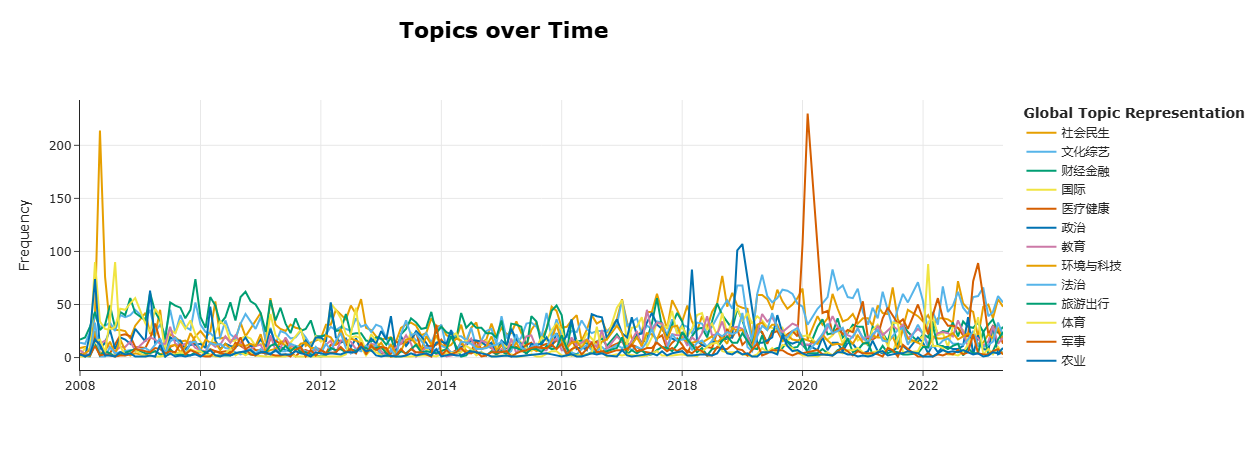

In [432]:
# 定义新闻时间戳
timestamps = pd.to_datetime(data_ltp['time']).dt.strftime('%Y-%m')

# 建构动态主题模型
topics_over_time = topic_model.topics_over_time(data, timestamps)
topic_model.visualize_topics_over_time(topics_over_time, custom_labels=True)

由于以 frequency 为 y 轴存在不同主题发布量差异大带来的尺度过大，难以观察的问题，因此进行时序数据处理，将发文量改为月占比，统一刻度

#### 3.5 假设检验

##### 3.5.1 显著性和时效性

In [436]:
# 获得动态主题模型数据
df_topics_over_time = pd.DataFrame(topics_over_time)
# 删除离群值
df_topics_over_time = df_topics_over_time.loc[df_topics_over_time['Topic'] != -1]
df_topics_over_time

,Topic,Words,Frequency,Timestamp,Name
1,0,"老人, 丽江, 物业, 奶奶, 物管",9,2008-01-01,社会民生
2,1,"电影, 中国, 李国修, 侯孝贤, 社会",14,2008-01-01,文化综艺
3,2,"基金, 市场, 投资, 公司, 投资者",17,2008-01-01,财经金融
4,3,"杜月笙, 洪兰友, 蒋介石, 上海, 王晓籁",2,2008-01-01,国际
5,4,"氟化物, 医疗, 医院, 保险, 卫生",4,2008-01-01,医疗健康
...,...,...,...,...,...
2468,8,"人民法院, 犯罪, 未成年人, 财产, 执行",21,2023-05-01,法治
2469,9,"景区, 游客, 国泰, 旅客, 旅游",24,2023-05-01,旅游出行
2470,10,"中国队, 比赛, 丁立人, 张之臻, 苏迪曼杯",3,2023-05-01,体育
2471,11,"美国, 海军, 菲律宾, 日本, 俄罗斯",3,2023-05-01,军事


In [506]:
# 计算不同主题的每月发文量占比
df_topics_over_time['percentage_per_month'] = df_topics_over_time.groupby('Timestamp')['Frequency'].transform(
    lambda x: x / x.sum()
)
# 计算不同主题每月发文量占比与上一个月的变化情况，从而判断变化趋势
df_topics_over_time['year'] = df_topics_over_time['Timestamp'].dt.year
df_topics_over_time['trends'] = df_topics_over_time.groupby('Name')['percentage_per_month'].transform(
    lambda x: x - x.shift(1)
    # lambda x: print(x)
)
# 定义增长为 1 降低为 0 缺失值为 -1
df_topics_over_time['trends'] = df_topics_over_time['trends'].transform(
    lambda x: 1 if x > 0 else (0 if x <= 0 else -1)
)
df_topics_over_time

,Topic,Words,Frequency,Timestamp,Name,percentage_per_month,year,trends
1,0,"老人, 丽江, 物业, 奶奶, 物管",9,2008-01-01,社会民生,0.132353,2008,-1
2,1,"电影, 中国, 李国修, 侯孝贤, 社会",14,2008-01-01,文化综艺,0.205882,2008,-1
3,2,"基金, 市场, 投资, 公司, 投资者",17,2008-01-01,财经金融,0.250000,2008,-1
4,3,"杜月笙, 洪兰友, 蒋介石, 上海, 王晓籁",2,2008-01-01,国际,0.029412,2008,-1
5,4,"氟化物, 医疗, 医院, 保险, 卫生",4,2008-01-01,医疗健康,0.058824,2008,-1
...,...,...,...,...,...,...,...,...
2468,8,"人民法院, 犯罪, 未成年人, 财产, 执行",21,2023-05-01,法治,0.079848,2023,0
2469,9,"景区, 游客, 国泰, 旅客, 旅游",24,2023-05-01,旅游出行,0.091255,2023,1
2470,10,"中国队, 比赛, 丁立人, 张之臻, 苏迪曼杯",3,2023-05-01,体育,0.011407,2023,0
2471,11,"美国, 海军, 菲律宾, 日本, 俄罗斯",3,2023-05-01,军事,0.011407,2023,0


In [508]:
# 使用 Plotly 可视化主题发文量月占比
fig = px.line(
    df_topics_over_time,
    x="Timestamp",  # 时间列
    y="percentage_per_month",  # 归一化频数列
    color="Name",  # 按主题分组
    title="动态主题趋势（月占比）",
    labels={"percentage_per_month": "月占比", "Timestamp": "时间", "Name": "主题"},
    line_shape="linear",  # 使用线性插值
)

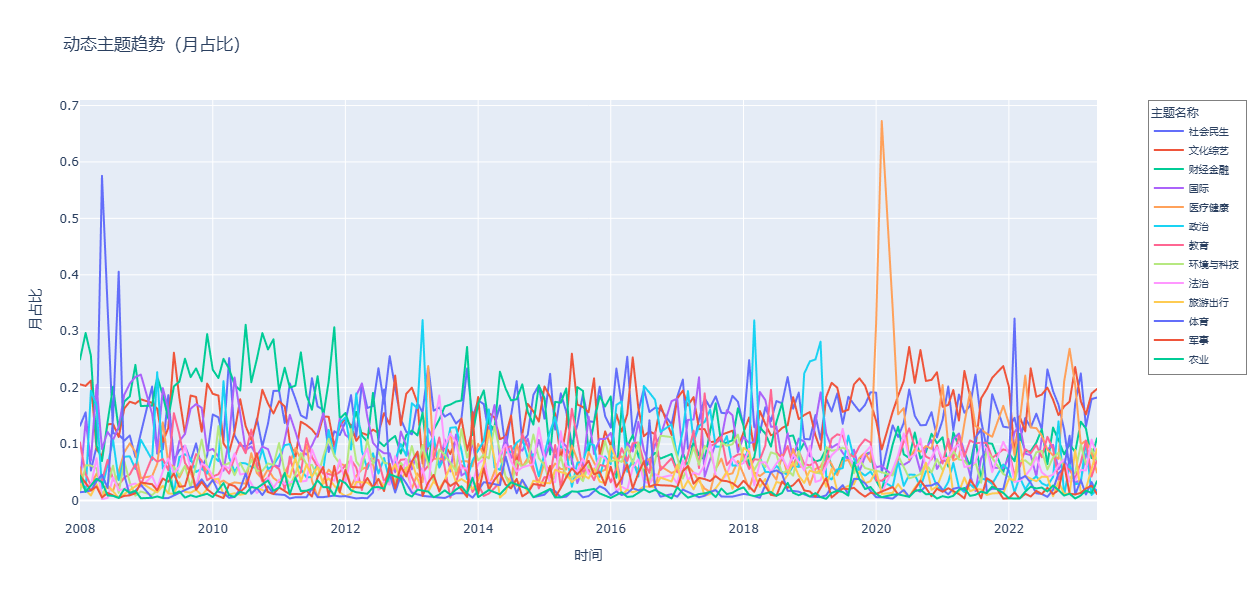

In [510]:
# 设置可视化格式和图例
fig.update_layout(
    width=1200,  # 设置宽度
    height=600,  # 设置高度
    legend=dict(
        title_text="主题名称",     # 图例标题
        orientation="v",          # 垂直排列
        x=1.05,                   # 将图例放置在图表右侧外部
        y=1,                      # 图例顶部对齐
        xanchor="left",           # 水平锚点在左侧
        yanchor="top",            # 垂直锚点在顶部
        bordercolor="grey",       # 图例边框颜色
        borderwidth=1,            # 边框宽度
        font=dict(size=10)        # 字体大小
    ),
    margin=dict(r=150)           # 留出右侧边距防止图例遮挡
)
fig.show()

由图可见，不同主题的发文量存在明显的规律性波动，且在某个日期存在猛增的现象，因此可以考虑：第一，不同主题的发文量存在季节性；第二，不同主题的发文量会因为某个社会性事件导致文章的集中发布，为事件造势或者进行快速报道，从而表征出新闻框架的时效性和显著性

In [674]:
# 选取每个主题发文月占比最高的三个聚类主题词
df_topics_over_time.sort_values(by=['Name', 'Frequency'], ascending=False).groupby('Name').head(3)

,Topic,Words,Frequency,Timestamp,Name,percentage_per_month,year,trends
300,2,"拆迁, 中国, 经济, 气候, 政府",74,2009-12-01,财经金融,0.294821,2009,1
438,2,"中国, 市场, 经济, 政策, 政府",62,2010-10-01,财经金融,0.296651,2010,1
178,2,"预算, 政府, 企业, 经济, 价格",61,2009-03-01,财经金融,0.220217,2009,1
55,0,"地震, 汶川, 中国, 灾区, 救援",214,2008-05-01,社会民生,0.575269,2008,1
1712,0,"台风, 山竹, 9月, 寿光, 社会",77,2018-09-01,社会民生,0.218750,2018,1
69,0,"地震, 重建, 灾区, 成都, 中国",76,2008-06-01,社会民生,0.342342,2008,0
1829,7,"汽车, 电鳗, 青年, 南阳, 环境",33,2019-05-01,环境与科技,0.088235,2019,0
1282,7,"石墨烯, 污染, 雾霾, 汽车, 行星",31,2015-12-01,环境与科技,0.105442,2015,1
1815,7,"汽车, 奔驰, 4s店, 服务费, 消费者",31,2019-04-01,环境与科技,0.094801,2019,1
1776,8,"解说词, 追逃, 人员, 犯罪, 红通",42,2019-01-01,法治,0.096774,2019,1


- 从数据中可以发现，每个主题的最高发文月占比，均与某个社会议题相关。比如，社会民生主题的月占比前三的新闻，分别对应汶川地震（2008-05），台风山竹（2018-09），这二者均为当时社会影响极大，社会关注度极高的话题；再比如旅游出行主题中，月占比前三的新闻，分别对应 mu5735 东航事故（2022-03），春运（2023-01、2018-01），医疗健康主题中月占比前三的新闻均与新冠疫情相关（2020-01、2020-02、2020-04）。这些现象反映出南方周末这一新闻机构，在新闻报道中存在明显的时效性和显著性的新闻框架。
1. 第一，时效性。南方周末会快速报道特定时间背景下的特定事件，从而将信息快速传递给公众。比如对汶川地震灾情进行快速集中的大量发布新闻，让公众及时了解相关信息和灾情变化
2. 第二，显著性。南方周末会集中报道特殊事件，从而突出事件的重要性、独特性或紧急性，引起公众的关注。比如，在新冠疫情的报道中，南方周末通过大量发文，从而以量强调该事件的重要性，达到最佳传播效果

##### 3.5.2 季节性

In [512]:
# 提取时序数据的月份，进行季节性的可视化分析
trends_data = df_topics_over_time[['Timestamp', 'year', 'Name', 'trends']]
trends_data['month'] = trends_data['Timestamp'].dt.month

In [516]:
# 获取主题名、年份和月份的列表
topic_name = trends_data['Name'].unique().tolist()
year = trends_data['year'].unique().tolist()
month = trends_data['month'].unique().tolist()

In [538]:
# 重新格式化数据，方便可视化操作
trends_data_pivot = trends_data.pivot(index=['Name', 'year'], columns='month', values='trends')
trends_data_pivot = trends_data_pivot.fillna(0)
trends_data_pivot.loc[pd.IndexSlice[:, 2023], pd.IndexSlice[6:13]] = -1
trends_data_pivot

In [530]:
# 配置可视化格式
plt.rcParams['font.family'] = 'sans-serif'  # 设置字体族
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置具体字体（例如：黑体）
plt.rcParams['font.size'] = 10  # 设置字体大小

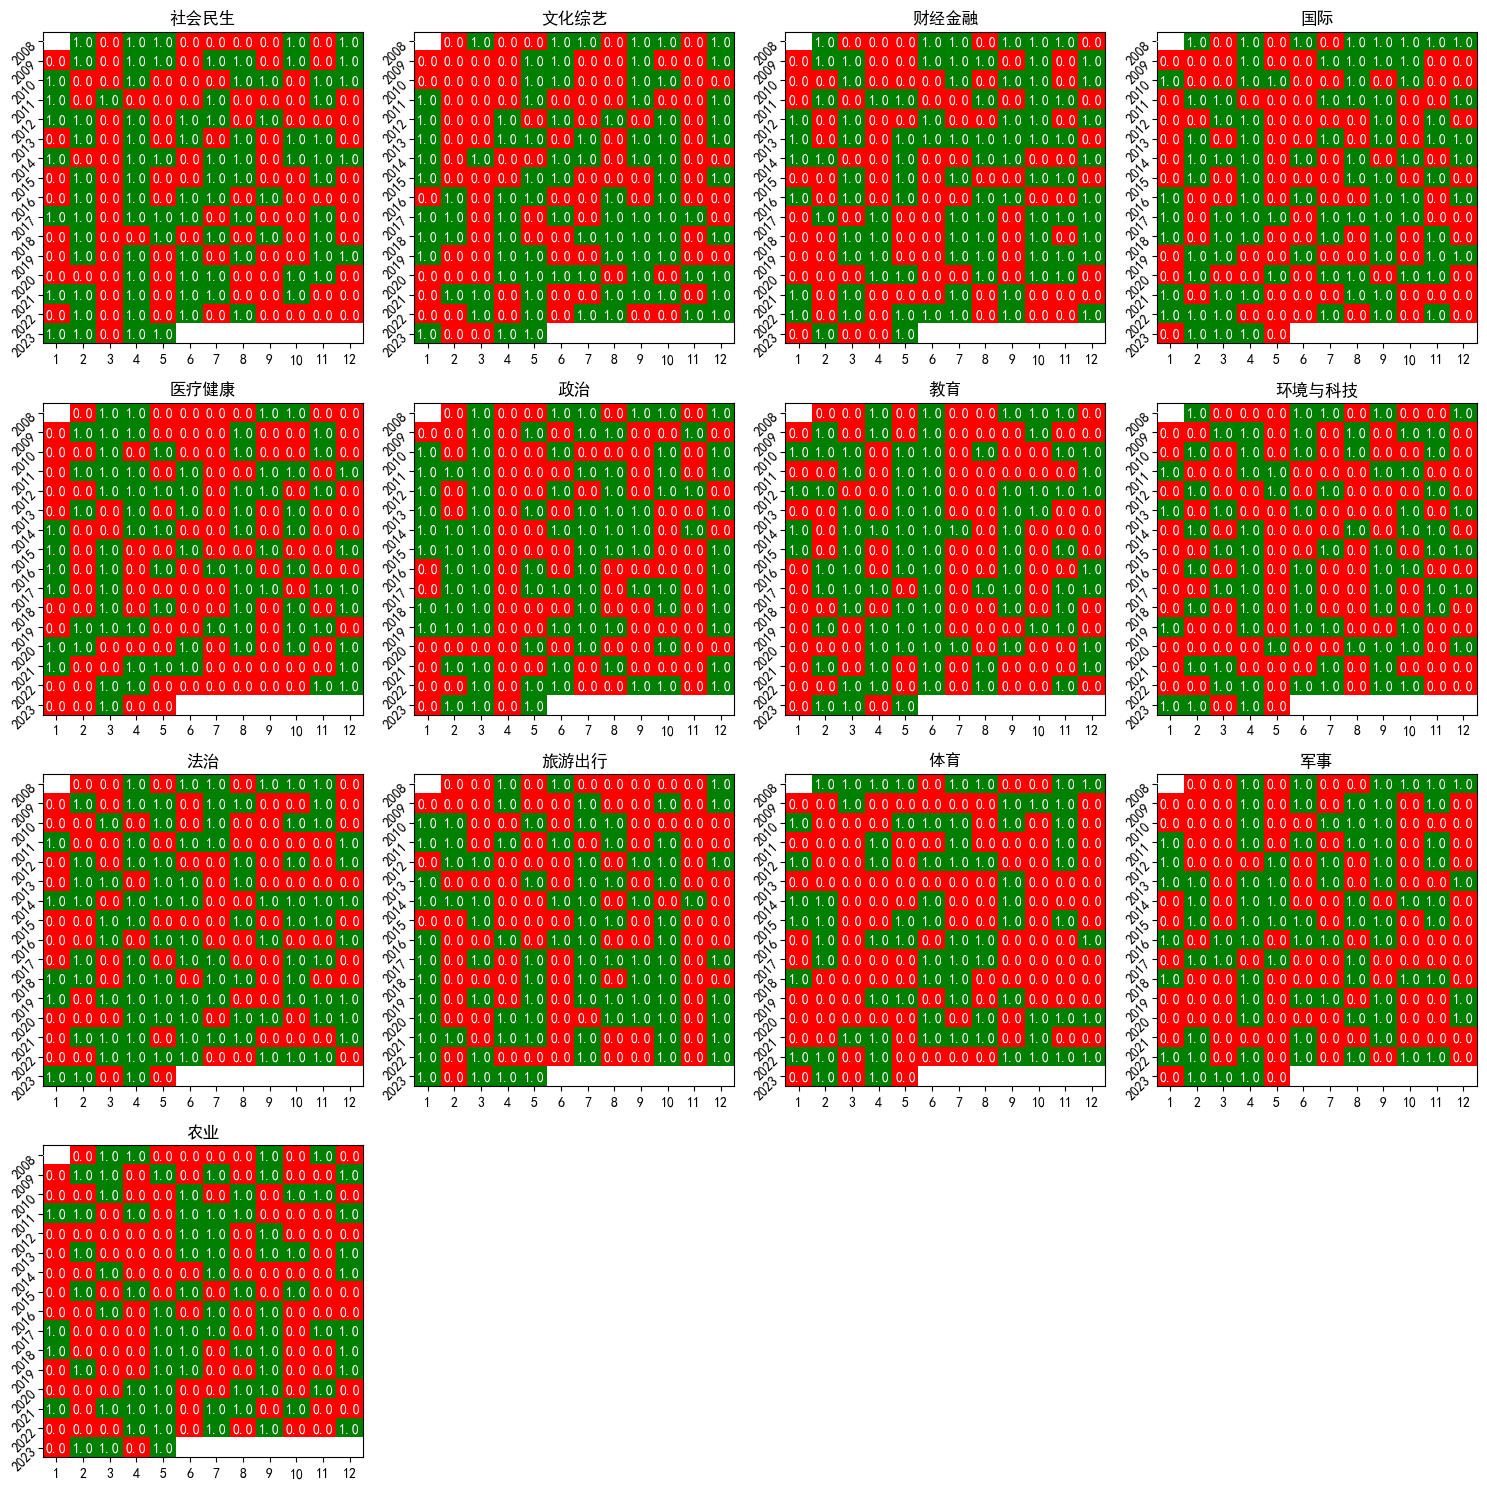

In [558]:
# 使用热力图进行各主题发文量的月占比可视化
fig, axe = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
# 自定义颜色映射
colors = [
    (0, 'white'),   # -1 对应白色
    (0.5, 'red'),      # 0 对应红色
    (1, 'green')     # 1 对应绿色
]

# 创建颜色映射
cmap = LinearSegmentedColormap.from_list("custom_cmap", [(c[0], c[1]) for c in colors])

for i, v in enumerate(topic_name):
    ax = axe[i // 4, i % 4]
    rec = trends_data_pivot.loc[v]
    im = ax.imshow(rec, cmap=cmap, aspect='auto')
    
    ax.set_yticks(range(len(year)), labels=year, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xticks(range(12), labels=rec.columns)
    ax.set_title(f'{v}')

    for x in range(len(year)):
        for y in range(12):
            ax.text(y, x, f'{rec.iloc[x, y]}', ha='center', va='center', color='white')

for i in range(13, 16):
    fig.delaxes(axe.flatten()[i])
plt.tight_layout()
plt.show()

- 从各主题发文量的月占比可视化热力图中可以发现，社会民生的新闻发布量在 3 月分普遍下降，在 4 月份普遍上升；类似地，文化综艺的新闻发布量在 3 月分普遍下降，在 5 月份普遍上升.为了进一步验证这一季节性是否具有统计学意义上的显著性，采用 Kruskal-Wallis 进行季节性的显著性检验

In [550]:
# 构建 Kruskal-Wallis 季节性检验数据集
season_data = trends_data[['Timestamp', 'Name', 'trends']]
stl_data = dict()
for name in topic_name:
    stl_data[name] = season_data.loc[season_data['Name'] == name][['Timestamp', 'trends']]

stl_data

{'社会民生':       Timestamp  trends
 1    2008-01-01      -1
 15   2008-02-01       1
 27   2008-03-01       0
 41   2008-04-01       1
 55   2008-05-01       1
 ...         ...     ...
 2404 2023-01-01       1
 2418 2023-02-01       1
 2432 2023-03-01       0
 2446 2023-04-01       1
 2460 2023-05-01       1
 
 [181 rows x 2 columns],
 '文化综艺':       Timestamp  trends
 2    2008-01-01      -1
 16   2008-02-01       0
 28   2008-03-01       1
 42   2008-04-01       0
 56   2008-05-01       0
 ...         ...     ...
 2405 2023-01-01       1
 2419 2023-02-01       0
 2433 2023-03-01       0
 2447 2023-04-01       1
 2461 2023-05-01       1
 
 [181 rows x 2 columns],
 '财经金融':       Timestamp  trends
 3    2008-01-01      -1
 17   2008-02-01       1
 29   2008-03-01       0
 43   2008-04-01       0
 57   2008-05-01       0
 ...         ...     ...
 2406 2023-01-01       0
 2420 2023-02-01       1
 2434 2023-03-01       0
 2448 2023-04-01       0
 2462 2023-05-01       1
 
 [181 rows x 2 colum

In [640]:
# 定义检验方法函数，返回 p 值，方便复用
def topic_kruskal(topic):
    # 按月份分组数据
    groups = [group["trends"].values for name, group in topic.groupby("month")]

    # 执行非参数检验
    stat, p_value = kruskal(*groups)
    return p_value

In [650]:
# 对不同主题进行显著性检验
res = {
    'topic': [],
    'p': [],
    'sig': []
}
for key, value in stl_data.items():
    res['topic'].append(key)
    topic_data = value
    topic_data["Timestamp"] = pd.to_datetime(topic_data["Timestamp"])
    # 提取月份和年份
    topic_data["year"] = topic_data["Timestamp"].dt.year
    topic_data["month"] = topic_data["Timestamp"].dt.month
    p_value = topic_kruskal(topic_data)
    res['p'].append(round(p_value, 4))
    if p_value < 0.05:
        res['sig'].append('季节性显著')
    else:
        res['sig'].append('季节性不显著')

res_df = pd.DataFrame(res)
res_df

,topic,p,sig
0,社会民生,0.0005,季节性显著
1,文化综艺,0.0245,季节性显著
2,财经金融,0.2659,季节性不显著
3,国际,0.0219,季节性显著
4,医疗健康,0.0315,季节性显著
5,政治,0.0000,季节性显著
6,教育,0.0001,季节性显著
7,环境与科技,0.0873,季节性不显著
8,法治,0.2285,季节性不显著
9,旅游出行,0.0011,季节性显著


- 如检验结果显示，社会民生（p=0.0005）、文化综艺（p=0.0245）、国际（p=0.0219）、医疗健康（p=0.0315）、政治（p=0.0000）、教育（p=0.0001）、旅游出行（p=0.0011）和军事类（p=0.0113）的新闻存在季节性变化趋势，而财经金融（p=0.2659）、环境与科技（p=0.0873）、法治（p=0.2285）、体育（p=0.5490）和农业（p=0.1979）五类主题的新闻不存在季节性变化趋势

## 4 结论与展望

#### 4.1 结论
- 南方周末的新闻发布中，体现出时效性、显著性和季节性的新闻框架。具体体现在：
- 第一，不同主题的发布量会随着相关主题的社会事件的出现和消失，出现增长和下降的趋势，且随着重要事件的出现，比如 2008 年北京奥运会和 2008 年汶川大地震以及 2020 年新冠疫情，均带来事件相关新闻发文量的陡增，这一现象表现出南方周末对于事件的快速反应，并在现实的发文量的短时间剧增中体现出来，反映出新闻框架的时效性和显著性；
- 第二，基于不同主题月发布占比热力图和 Kruskal-Wallis 季节性假设检验的结果发现，社会民生、文化综艺和医疗健康等 8 类主题的新闻存在季节性变化趋势，而财经金融、环境与科技和法治等 5 类主题的新闻不存在季节性变化趋势。由于新闻框架具有时效性和显著性，新闻与现实社会事件密切相关，因此不同主题新闻发布量的每月变化趋势，往往象征着公众注意力和社会实践在不同主题上的注意力的转向。比如说，教育主题新闻发布量在每年的 5 月和 6 月普遍上涨，与之相关的高考对这一趋势无疑产生显著影响；再比如，旅游出行主题在每年的 1 月存在普遍上涨的现象，与之相关的春运是这一现象的关键因素之一。因此，新闻变化的季节性反映出社会实践变化的规律性，这一方面有助于南方周末等新闻机构不断优化机构内的新闻框架，在对新闻事件“响应类”的新闻报道外，即时预备好“预测性”的新闻报道应对措施，根据季节性特征，即时在特定时间段之前做好策划工作，以为公众提供的质量更好时效更强的新闻内容，提高机构知名度；另一方面，市场营销等机构，也能够基于这一季节性，预测公众的关注点，从而指定更好的营销、公关策略等。
#### 4.2 研究不足与展望
- 本研究存在明显不足：
- 第一，主题建模存在主观性的问题。虽然初步的主题建模完全由 BERTopic 自行完成，具有客观性，然而进一步的主题大类分配为研究者基于主题词、代表文档和主题大类的匹配度手动完成，其中对于匹配度的测量具有主观性。因此，未来可以考虑利用结合 BERTopic 和深度学习的方法，训练新闻主题分类模型，进行自动化主题分类，以提高主题建模的客观性。
- 第二，对于新闻框架的时效性和显著性的验证存在经验主义的缺陷，无法完全通过假设检验的量化方法来验证假设
- 第三，对于新闻框架的季节性验证虽然确实在统计学意义上存在显著性，但是对于其背后的社会原因，比如为什么体育主题不存在季节性、军事主题存在季节性等问题，并没有提供合理解读，未来可以深挖某一主题的具体新闻文本，探索该主题季节性背后的深层原因和意义。